# Student Data from CSV

This notebooks reads sample data from `data/StudentsPerformance.csv` and plots it using Matplotlib. Edit `data/StudentsPerformance.csv` and re-run this cell to see how the plots change!

### Creating a graph to understand the average math scores by gender

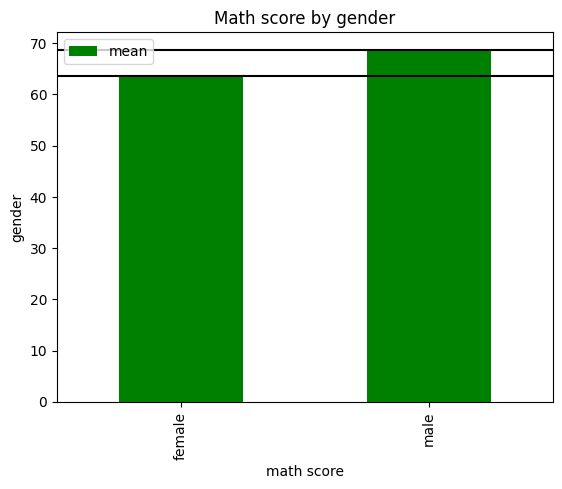

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('../data/StudentsPerformance.csv')
x = df['math score']
y = df['gender']

# group data and summarise it
summary = df.groupby('gender')['math score'].agg(['mean', 'std'])

summary.plot.bar(y='mean', xerr='std', color='green')
plt.title("Math score by gender")
plt.legend()
plt.xlabel('math score')
plt.ylabel('gender')
plt.show()

### Creating a graph to understand the average reading scores by gender

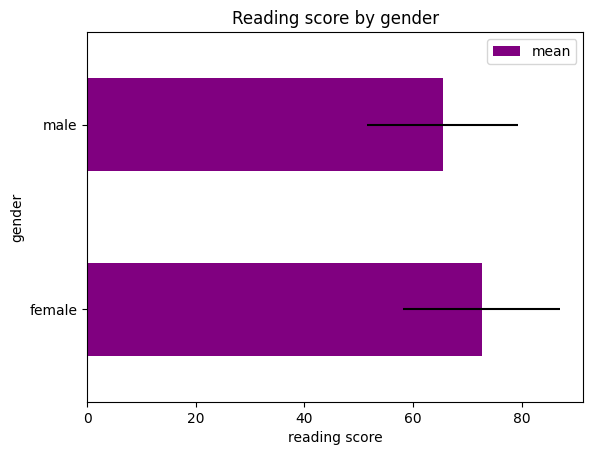

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('../data/StudentsPerformance.csv')
x = df['reading score']
y = df['gender']

# group data and summarise it
summary = df.groupby('gender')['reading score'].agg(['mean', 'std'])

summary.plot.barh(y='mean', xerr='std', color='purple')
plt.title("Reading score by gender")
plt.legend()
plt.xlabel('reading score')
plt.ylabel('gender')
plt.show()

### Creating a graph to understand the average writing scores by gender 

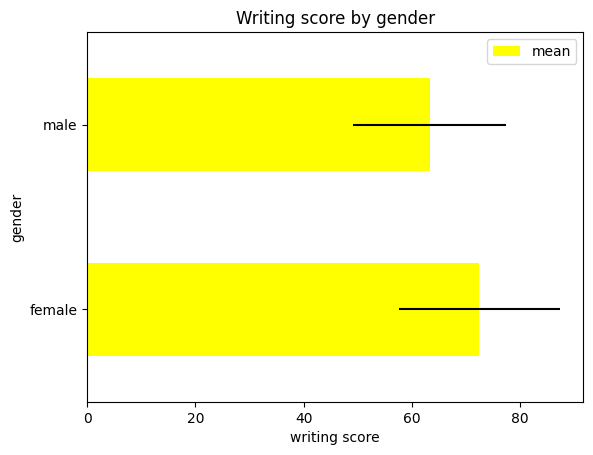

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('../data/StudentsPerformance.csv')
x = df['writing score']
y = df['gender']

# group data and summarise it
summary = df.groupby('gender')['writing score'].agg(['mean', 'std'])

summary.plot.barh(y='mean', xerr='std', color='yellow')
plt.title("Writing score by gender")
plt.legend()
plt.xlabel('writing score')
plt.ylabel('gender')
plt.show()

# Exploratory Data Analysis

Exploratory data analysis is the process of exploring your data, and it typically includes examining the structure and components of your dataset, the distributions of individual variables, and the relationships between two or more variables. The most heavily relied upon tool for exploratory data analysis is visualizing data using a graphical representation of the data. Data visualization is arguably the most important tool for exploratory data analysis because the information conveyed by graphical display can be very quickly absorbed and because it is generally easy to recognize patterns in a graphical display.

There are several goals of exploratory data analysis, which are:

    1. To determine if there are any problems with your dataset.

    2. To determine whether the question you are asking can be answered by the data that you have.

    3. To develop a sketch of the answer to your question.


We will run through an informal “checklist” of things to do when embarking on an exploratory data analysis

Firstly we need to import some support tools
    1. matplodlib - to asist with creating the data visualisation when required
    2. pandas - to support our data analysis
    3. numpy - to support our numerical analysis

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#matplotlib inline

## Read in your data

The next task in any exploratory data analysis is to read in some data. Sometimes the data will come in a very messy format and you’ll need to do some cleaning. Other times, someone else will have cleaned up that data for you so you’ll be spared the pain of having to do the cleaning.

In [7]:
scores = pd.read_csv('../data/StudentsPerformance.csv', 
                     dtype = {'gender':'category',
                              'race/ethnicity':'category',
                              'parental level of education':'category',
                              'lunch':'category',
                              'test preparation course':'category'})

In [8]:
scores.rename(columns=lambda x: x.strip(" ").replace(' ', '_'), inplace=True)

In [9]:
scores.dtypes

gender                         category
race/ethnicity                 category
parental_level_of_education    category
lunch                          category
test_preparation_course        category
math_score                        int64
reading_score                     int64
writing_score                     int64
dtype: object

## Check the Packaging

In [10]:
scores.shape

(1000, 8)

Number of rows

In [11]:
len(scores.index)

1000

Number of cols

In [12]:
len(scores.columns)


8

In [13]:
scores.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,1000,2,female,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race/ethnicity,1000,5,group C,319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parental_level_of_education,1000,6,some college,226,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lunch,1000,2,standard,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
test_preparation_course,1000,2,none,642,NaN,NaN,NaN,NaN,NaN,NaN,NaN
math_score,1000.0,NaN,NaN,NaN,66.089,15.16308,0.0,57.0,66.0,77.0,100.0
reading_score,1000.0,NaN,NaN,NaN,69.169,14.600192,17.0,59.0,70.0,79.0,100.0
writing_score,1000.0,NaN,NaN,NaN,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [14]:
scores.sample(10)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
36,female,group D,associate's degree,standard,none,74,81,83
84,male,group D,high school,free/reduced,none,42,39,34
331,male,group C,associate's degree,standard,none,47,37,35
682,male,group B,high school,standard,none,62,55,54
493,female,group C,bachelor's degree,standard,none,81,88,90
232,female,group B,bachelor's degree,standard,none,67,86,83
803,female,group B,some college,standard,none,82,85,87
234,male,group C,bachelor's degree,standard,completed,83,82,84
146,male,group B,some high school,standard,none,88,84,75
343,male,group D,associate's degree,standard,completed,67,72,67


## Look at the Top and the Bottom of your Data

In [15]:
scores.iloc[:,[0,2,3,5,6,7]].head(10)

,gender,parental_level_of_education,lunch,math_score,reading_score,writing_score
0,female,bachelor's degree,standard,72,72,74
1,female,some college,standard,69,90,88
2,female,master's degree,standard,90,95,93
3,male,associate's degree,free/reduced,47,57,44
4,male,some college,standard,76,78,75
5,female,associate's degree,standard,71,83,78
6,female,some college,standard,88,95,92
7,male,some college,free/reduced,40,43,39
8,male,high school,free/reduced,64,64,67
9,female,high school,free/reduced,38,60,50


In [16]:
scores.iloc[:,[0,2,3,5,6,7]].tail(10)

,gender,parental_level_of_education,lunch,math_score,reading_score,writing_score
990,male,high school,free/reduced,86,81,75
991,female,some high school,standard,65,82,78
992,female,associate's degree,free/reduced,55,76,76
993,female,bachelor's degree,free/reduced,62,72,74
994,male,high school,standard,63,63,62
995,female,master's degree,standard,88,99,95
996,male,high school,free/reduced,62,55,55
997,female,high school,free/reduced,59,71,65
998,female,some college,standard,68,78,77
999,female,some college,free/reduced,77,86,86


## Checking “n”s

In [17]:
scores.parental_level_of_education.head(1000)

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental_level_of_education, Length: 1000, dtype: category
Categories (6, object): ['associate's degree', 'bachelor's degree', 'high school', 'master's degree', 'some college', 'some high school']

In [18]:
scores.parental_level_of_education.unique()

['bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school', 'some high school']
Categories (6, object): ['associate's degree', 'bachelor's degree', 'high school', 'master's degree', 'some college', 'some high school']

In [19]:
len(scores.parental_level_of_education.unique())

6

In [20]:
pd.Series(scores.parental_level_of_education.cat.categories)

0    associate's degree
1     bachelor's degree
2           high school
3       master's degree
4          some college
5      some high school
dtype: object

## Validate With at Least One External Data Source

In [21]:
ozone.Sample_Measurement.describe()

NameError: name 'ozone' is not defined

In [ ]:
ozone.Sample_Measurement.quantile([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [ ]:
df['parental level of education'].value_counts()

NameError: name 'df' is not defined

## Make a plot

In [22]:
import seaborn as sns

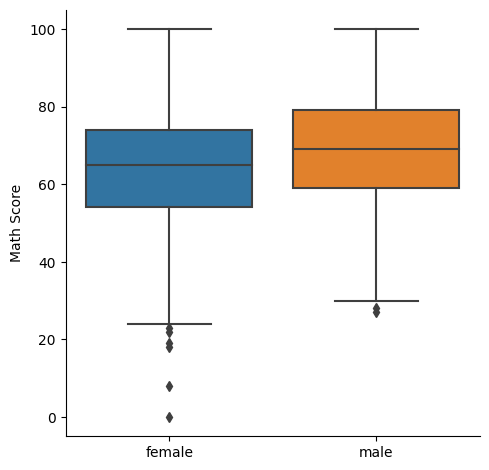

In [25]:
g = sns.catplot(data=scores.sample(1000), x='gender', y='math_score', kind='box', aspect=1.0)
g.set_axis_labels("", "Math Score")
g.set_xticklabels(rotation=0)